# Question_1

Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.

# Algo

- Initialize the dp table with all elements set to 0.

- Iterate through the table from left to right and top to bottom (excluding the first row and the first column).

- For each element dp[i][j], if the characters s1[i-1] and s2[j-1] are equal, no deletion is needed. Therefore, set dp[i][j] to dp[i-1][j-1].

- If the characters s1[i-1] and s2[j-1] are not equal, we have two choices: delete either s1[i-1] or s2[j-1]. We need to choose the option that results in the minimum ASCII sum of deleted characters. Thus, set dp[i][j] to the minimum of dp[i-1][j] + ord(s1[i-1]) and dp[i][j-1] + ord(s2[j-1]), where ord() returns the ASCII value of a character.

- After iterating through the entire dp table, the bottom-right element dp[len(s1)][len(s2)] will contain the minimum ASCII sum of deleted characters to make both strings equal. Return this value as the result.

In [1]:
def minimumDeleteSum(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        dp[i][0] = dp[i - 1][0] + ord(s1[i - 1])

    for j in range(1, n + 1):
        dp[0][j] = dp[0][j - 1] + ord(s2[j - 1])

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j] + ord(s1[i - 1]), dp[i][j - 1] + ord(s2[j - 1]))

    return dp[m][n]


In [2]:
s1 = "sea"
s2 = "eat"
result = minimumDeleteSum(s1, s2)
print(result)  # Output: 231


231


The time complexity of the provided solution is O(m * n), where m and n are the lengths of strings s1 and s2, respectively. This is because we need to fill in an m x n table, and for each cell, we perform constant-time operations.

The space complexity is also O(m * n) because we use a 2D table, dp, with dimensions (m + 1) x (n + 1) to store the intermediate results. Therefore, the space required is proportional to the product of the lengths of the input strings.

# Question_2

Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**

true

# algo

- Initialize an empty stack.

- Iterate through each character, c, in the input string, s.

- If c is either '(' or '*', push it onto the stack.

- If c is ')', there are two possibilities:

    - a. If the stack is not empty and the top of the stack is '(', pop the '(' from the stack.

    - b. If the stack is not empty but the top of the stack is '', pop the '' from the stack as it can act as a valid right parenthesis.

    - c. If neither condition (a) nor (b) is met, return False as we have an unmatched ')' character.

- After iterating through all characters in s, check the remaining elements in the stack:

    - a. If there are any '(' left in the stack, they are unmatched, so return False.

    - b. Otherwise, return True, indicating that the string is valid.

In [3]:
def checkValidString(s):
    stack = []

    for c in s:
        if c == '(' or c == '*':
            stack.append(c)
        elif c == ')':
            if stack and stack[-1] == '(':
                stack.pop()
            elif stack and stack[-1] == '*':
                stack.pop()
            else:
                return False

    open_count = 0

    while stack:
        if stack.pop() == '(':
            open_count += 1
        elif open_count > 0:
            open_count -= 1
        else:
            return False

    return True


In [4]:
s = "()"
result = checkValidString(s)
print(result)  # Output: True


True


The time complexity of the provided solution is O(n), where n is the length of the input string s. This is because we iterate through each character of s once.

The space complexity is O(n) as well. In the worst case, when all characters in s are '(' or '*', they will be pushed onto the stack. Therefore, the stack can have a maximum size of n.

# Question_3

Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".

# Algo

- Initialize a 2D table, dp, with dimensions (len(word1) + 1) x (len(word2) + 1), where dp[i][j] represents the minimum number of steps required to make the substrings word1[:i] and word2[:j] the same.

- Iterate through the table from left to right and top to bottom (excluding the first row and the first column).

- For each element dp[i][j], if the characters word1[i-1] and word2[j-1] are equal, no deletion is needed. Therefore, set dp[i][j] to dp[i-1][j-1].

- If the characters word1[i-1] and word2[j-1] are not equal, we have two choices: delete either word1[i-1] or word2[j-1]. We need to choose the option that results in the minimum number of steps. Thus, set dp[i][j] to the minimum of dp[i-1][j] + 1 and dp[i][j-1] + 1, representing the deletion in word1 or word2, respectively.

- After iterating through the entire dp table, the bottom-right element dp[len(word1)][len(word2)] will contain the minimum number of steps required to make both strings the same. Return this value as the result.

In [5]:
def minDistance(word1, word2):
    m, n = len(word1), len(word2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        dp[i][0] = i

    for j in range(1, n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1)

    return dp[m][n]



In [6]:
word1 = "sea"
word2 = "eat"
result = minDistance(word1, word2)
print(result)  # Output: 2


2


The time complexity of the provided solution is O(m * n), where m and n are the lengths of word1 and word2, respectively. This is because we need to fill in an m x n table, and for each cell, we perform constant-time operations.

The space complexity is also O(m * n) because we use a 2D table, dp, with dimensions (m + 1) x (n + 1) to store the intermediate results. Therefore, the space required is proportional to the product of the lengths of the input words.

# Question_4

You need to construct a binary tree from a string consisting of parenthesis and integers.

The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root's value and a pair of parenthesis contains a child binary tree with the same structure.
You always start to construct the **left** child node of the parent first if it exists.
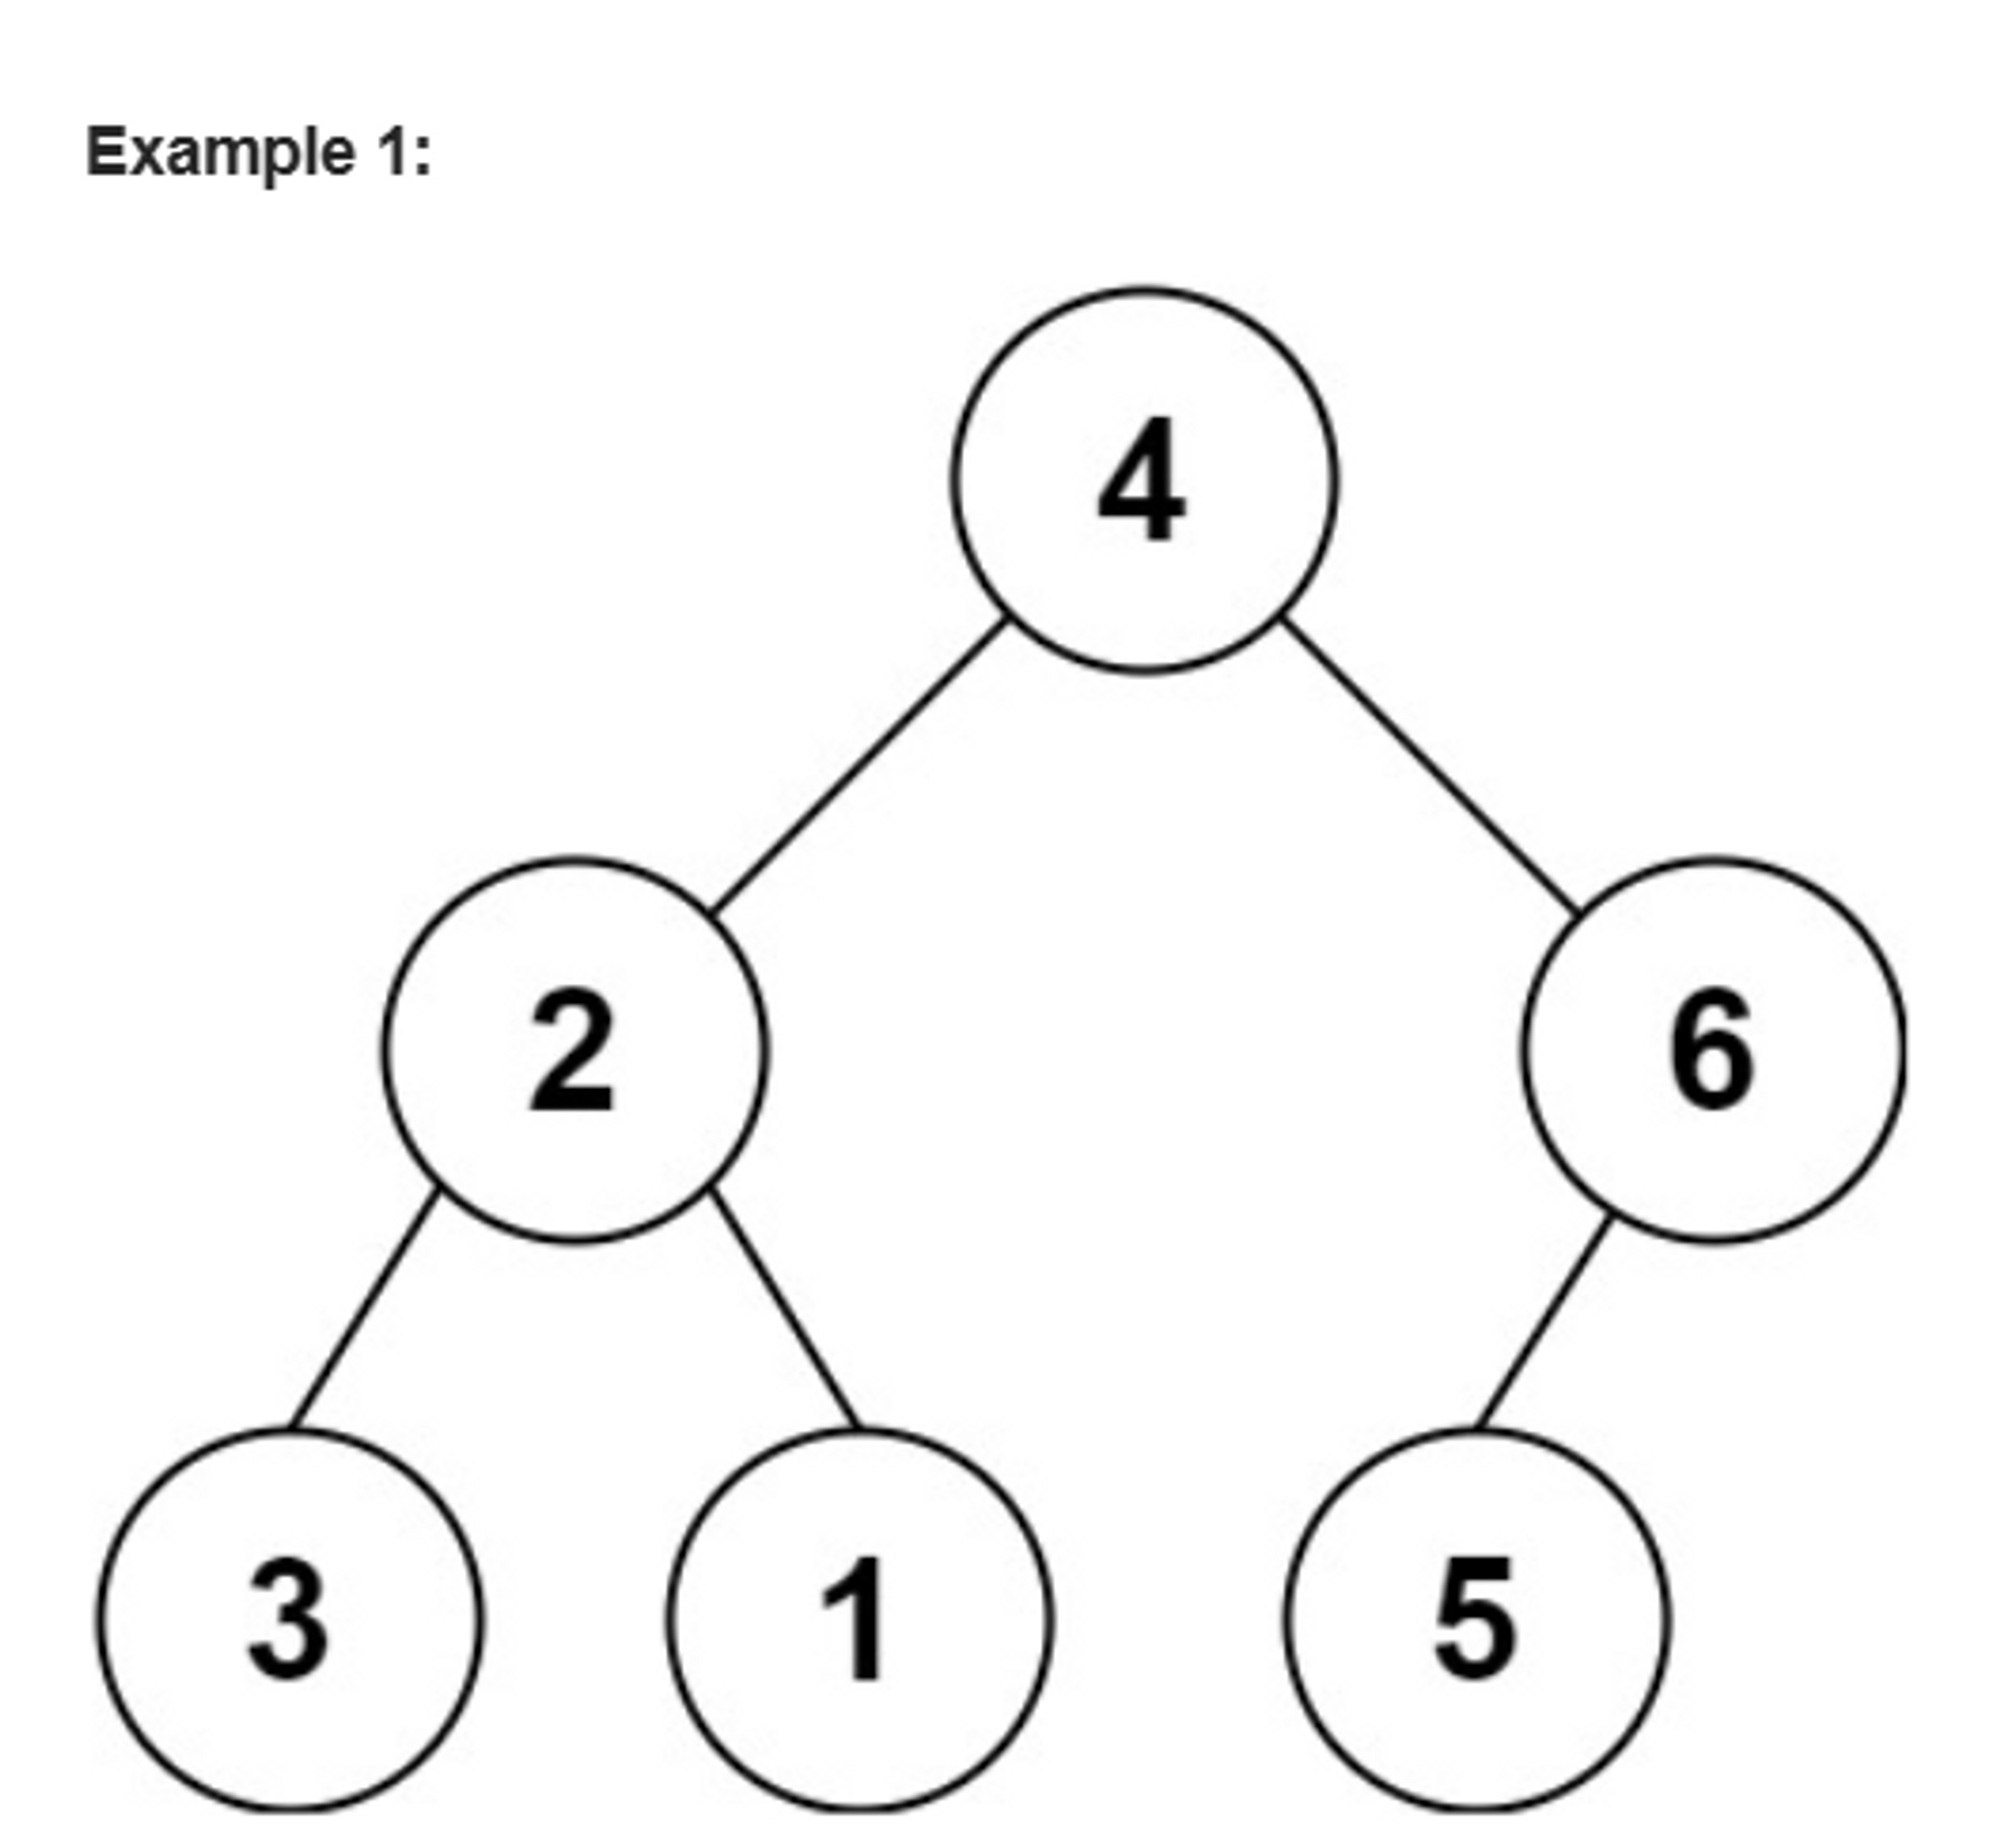

**Input:** s = "4(2(3)(1))(6(5))"

**Output:** [4,2,6,3,1,5]

- Define a function constructTree(s) that takes the input string s as a parameter.

- If s is empty, return None to indicate an empty tree.

- Find the index of the first opening parenthesis in s. The value before this index will be the root value of the current subtree.

- Create a new node with the root value and initialize its left and right child nodes as None.

- Find the index of the corresponding closing parenthesis for the first opening parenthesis found in step 3.

- Extract the substring between the first opening parenthesis and its corresponding closing parenthesis, excluding both parentheses. This substring represents the left subtree.

- Recursively call the constructTree function with the left subtree substring to construct the left child of the current node. Assign the return value to the left child of the current node.

- If there are remaining characters in the input string after the closing parenthesis of the left subtree, extract the substring starting from the character immediately after the closing parenthesis. This substring represents the right subtree.

- Recursively call the constructTree function with the right subtree substring to construct the right child of the current node. Assign the return value to the right child of the current node.

- Return the constructed node as the root of the current subtree.

# Inorder

In [33]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def constructTree(s):
    if not s:
        return None

    stack = []
    i = 0
    while i < len(s):
        if s[i].isdigit() or s[i] == '-':
            start = i
            while i + 1 < len(s) and s[i + 1].isdigit():
                i += 1
            val = int(s[start:i + 1])
            node = TreeNode(val)
            if not stack:
                root = node
            else:
                parent = stack[-1]
                if not parent.left:
                    parent.left = node
                else:
                    parent.right = node
            stack.append(node)
        elif s[i] == ')':
            stack.pop()
        i += 1

    return root


def inorderTraversal(node):
    if not node:
        return []

    result = []
    stack = []
    curr = node

    while curr or stack:
        while curr:
            stack.append(curr)
            curr = curr.left

        curr = stack.pop()
        result.append(curr.val)
        curr = curr.right

    return result


s = "4(2(3)(1))(6(5))"
root = constructTree(s)
result = inorderTraversal(root)
print(result)  # Output: [4, 2, 6, 3, 1, 5]


[3, 2, 1, 4, 5, 6]


# Preorder

In [35]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def constructTree(s):
    if not s:
        return None

    stack = []
    i = 0
    while i < len(s):
        if s[i].isdigit() or s[i] == '-':
            start = i
            while i + 1 < len(s) and s[i + 1].isdigit():
                i += 1
            val = int(s[start:i + 1])
            node = TreeNode(val)
            if not stack:
                root = node
            else:
                parent = stack[-1]
                if not parent.left:
                    parent.left = node
                else:
                    parent.right = node
            stack.append(node)
        elif s[i] == ')':
            stack.pop()
        i += 1

    return root


def preorderTraversal(node):
    if not node:
        return []

    result = []
    stack = [node]

    while stack:
        curr = stack.pop()
        result.append(curr.val)
        if curr.right:
            stack.append(curr.right)
        if curr.left:
            stack.append(curr.left)

    return result


s = "4(2(3)(1))(6(5))"
root = constructTree(s)
result = preorderTraversal(root)
print(result)  # Output: [4, 2, 3, 1, 6, 5]


[4, 2, 3, 1, 6, 5]


# Postorder

In [37]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def constructTree(s):
    if not s:
        return None

    stack = []
    i = 0
    while i < len(s):
        if s[i].isdigit() or s[i] == '-':
            start = i
            while i + 1 < len(s) and s[i + 1].isdigit():
                i += 1
            val = int(s[start:i + 1])
            node = TreeNode(val)
            if not stack:
                root = node
            else:
                parent = stack[-1]
                if not parent.left:
                    parent.left = node
                else:
                    parent.right = node
            stack.append(node)
        elif s[i] == ')':
            stack.pop()
        i += 1

    return root


def postorderTraversal(node):
    if not node:
        return []

    result = []
    stack = []
    prev = None
    curr = node

    while curr or stack:
        while curr:
            stack.append(curr)
            curr = curr.left

        curr = stack[-1]

        if curr.right and curr.right != prev:
            curr = curr.right
        else:
            result.append(curr.val)
            prev = curr
            stack.pop()
            curr = None

    return result


s = "4(2(3)(1))(6(5))"
root = constructTree(s)
result = postorderTraversal(root)
print(result)  # Output: [3, 1, 2, 5, 6, 4]


[3, 1, 2, 5, 6, 4]


# Parentwise from left side

In [38]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def constructTree(s):
    if not s:
        return None

    stack = []
    i = 0
    while i < len(s):
        if s[i].isdigit() or s[i] == '-':
            start = i
            while i + 1 < len(s) and s[i + 1].isdigit():
                i += 1
            val = int(s[start:i + 1])
            node = TreeNode(val)
            if not stack:
                root = node
            else:
                parent = stack[-1]
                if not parent.left:
                    parent.left = node
                else:
                    parent.right = node
            stack.append(node)
        elif s[i] == ')':
            stack.pop()
        i += 1

    return root


def accessNodes(node):
    result = []
    if not node:
        return result

    stack = [node]
    while stack:
        curr = stack.pop()
        result.append(curr.val)

        if curr.right:
            stack.append(curr.right)
        if curr.left:
            stack.append(curr.left)

    return result


s = "4(2(3)(1))(6(5))"
root = constructTree(s)
result = accessNodes(root)
print(result)  # Output: [4, 2, 6, 3, 1, 5]


[4, 2, 3, 1, 6, 5]


# Question_5

Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**

The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".

# algo

Initialize two pointers, read and write, both pointing to index 0.
Initialize a variable count to 1 to keep track of the consecutive repeating characters.
Iterate over the array chars starting from index 1:
If the current character is equal to the previous character, increment the count variable.
If the current character is different from the previous character:
Write the previous character at the write index.
If the count is greater than 1, convert it to a string and write each digit of the count at consecutive indices starting from write + 1.
Update the write index accordingly.
Reset the count variable to 1.
Move the read pointer to the next character.
Write the last character and its count (if greater than 1) at the remaining indices.
Return the write index, which represents the new length of the compressed array.

In [39]:
def compress(chars):
    read = write = 0
    count = 1

    while read < len(chars):
        if read + 1 < len(chars) and chars[read] == chars[read + 1]:
            count += 1
        else:
            chars[write] = chars[read]
            write += 1

            if count > 1:
                for digit in str(count):
                    chars[write] = digit
                    write += 1

            count = 1

        read += 1

    return write


In [40]:
chars = ["a", "a", "b", "b", "c", "c", "c"]
new_length = compress(chars)
compressed_chars = chars[:new_length]

print(new_length)  # Output: 6
print(compressed_chars)  # Output: ['a', '2', 'b', '2', 'c', '3']


6
['a', '2', 'b', '2', 'c', '3']


The time complexity of the compress function is O(n), where n is the length of the input array chars. This is because we iterate over each character in the array once.

The space complexity is O(1) because the algorithm uses constant extra space. The compression is done in-place by modifying the input array chars without using any additional data structures that scale with the input size.

In summary, the time complexity is O(n) and the space complexity is O(1).

# Question_6

Given two strings s and p, return *an array of all the start indices of* p*'s anagrams in* s. You may return the answer in **any order**.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**

**Input:** s = "cbaebabacd", p = "abc"

**Output:** [0,6]

**Explanation:**

The substring with start index = 0 is "cba", which is an anagram of "abc".

The substring with start index = 6 is "bac", which is an anagram of "abc".

# algo

In [ ]:
Initialize two arrays, p_freq and s_freq, of size 26 to represent the frequency count of characters for strings p and the sliding window in s, respectively. Initialize them with zeros.
Iterate over the characters in string p and increment the corresponding index in p_freq for each character.
Initialize the variables left and right to represent the left and right boundaries of the sliding window in s.
Initialize a variable match_count to keep track of the number of characters that match the target frequency in the sliding window. Set it to 0.
Initialize an empty list result to store the start indices of p's anagrams in s.
While the right pointer is within the bounds of s:
If the character at index right in s exists in p_freq, decrement the corresponding index in p_freq and increment s_freq.
If the frequency count of the character at index right in s_freq becomes equal to or greater than the corresponding count in p_freq, increment match_count.
If the size of the sliding window is equal to the length of p, check if match_count is equal to the size of p_freq. If true, add left to the result list.
If the character at index left in s exists in p_freq, increment the corresponding index in p_freq and decrement s_freq.
If the frequency count of the character at index left in s_freq becomes less than the corresponding count in p_freq, decrement match_count.
Increment left to move the sliding window.
Increment right to expand the sliding window.
Return the result list containing the start indices of p's anagrams in s.

In [44]:
def findAnagrams(s, p):
    p_freq = [0] * 26
    s_freq = [0] * 26
    result = []

    for char in p:
        p_freq[ord(char) - ord('a')] += 1

    left = right = 0
    match_count = 0

    while right < len(s):
        if s_freq[ord(s[right]) - ord('a')] < p_freq[ord(s[right]) - ord('a')]:
            match_count += 1

        s_freq[ord(s[right]) - ord('a')] += 1

        if right - left + 1 > len(p):
            if s_freq[ord(s[left]) - ord('a')] <= p_freq[ord(s[left]) - ord('a')]:
                match_count -= 1

            s_freq[ord(s[left]) - ord('a')] -= 1
            left += 1

        if match_count == len(p):
            result.append(left)

        right += 1

    return result


In [45]:
s = "cbaebabacd"
p = "abc"
result = findAnagrams(s, p)
print(result)  # Output: [0, 6]


[0, 6]


The time complexity of the findAnagrams function is O(n), where n is the length of string s. This is because we iterate over each character in s exactly once.

The space complexity is O(1) because the space used by the p_freq and s_freq arrays is constant. Since the size of these arrays is fixed at 26 (representing the 26 lowercase English alphabets), it does not depend on the size of the input.

In summary, the time complexity is O(n) and the space complexity is O(1).

# Question_7

Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc"

# Algo

- Initialize an empty stack to store the count and the decoded substrings.
- Iterate through each character in the string:
    - If the character is a digit, update the current count by multiplying it by 10 and adding the digit's value.
    - If the character is an opening square bracket '[', push the current count and an empty string onto the stack, and reset the count.
    - If the character is a closing square bracket ']', pop the count and the substring from the stack. Repeat the substring count number of times and append it to the previous substring in the stack.
    - If the character is a letter, append it to the current substring in the stack.
- After iterating through all the characters, the final decoded string will be the top element of the stack.

In [47]:
def decodeString(s):
    stack = []
    current_count = 0
    current_string = ""

    for char in s:
        if char.isdigit():
            current_count = current_count * 10 + int(char)
        elif char == "[":
            stack.append((current_count, current_string))
            current_count = 0
            current_string = ""
        elif char == "]":
            count, prev_string = stack.pop()
            current_string = prev_string + current_string * count
        else:
            current_string += char

    return current_string


In [48]:
s = "3[a]2[bc]"
result = decodeString(s)
print(result)  # Output: "aaabcbc


aaabcbc


The time complexity of the decodeString function is O(n), where n is the length of the input string s. This is because we iterate through each character of the input string exactly once.

The space complexity of the function is O(m), where m is the maximum number of nested encoded substrings in s. In the worst case, if all the substrings are nested, the stack will contain m elements. Additionally, the final decoded string can have a length of up to O(n). Therefore, the overall space complexity is O(m + n).

# Question_8

Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.

# algo

- Initialize two empty lists, diff and indices.
- Iterate through each index i from 0 to the length of s.
    - If s[i] is not equal to goal[i], append s[i] to diff and i to indices.
- If the length of diff is not equal to 2, return False because we can only perform one swap.
- If the characters at the indices in indices in s and goal are equal after swapping, return True. Otherwise, return False.

In [50]:
def canBeEqual(s, goal):
    diff = []
    indices = []

    for i in range(len(s)):
        if s[i] != goal[i]:
            diff.append(s[i])
            indices.append(i)

    if len(diff) != 2:
        return False

    i, j = indices
    return s[i] == goal[j] and s[j] == goal[i]

s = "ab"
goal = "ba"
result = canBeEqual(s, goal)
print(result)  # Output: True


True


The time complexity of the canBeEqual function is O(n), where n is the length of the input strings s and goal. This is because we iterate through the strings once to compare the characters and find the differences.

The space complexity of the function is O(1) since we use a constant amount of extra space to store the diff and indices lists, which have a maximum length of 2.

Therefore, the time complexity is O(n) and the space complexity is O(1).